# 04_Multivariate_Multiple_Regression

In [72]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [73]:
iris = datasets.load_iris()
data = iris.data

## Multivariate Multiple Linear Regression

In [74]:
class MultivariateOLS:
    """
    Multivariate Multiple Regression, takes several X features
    to predict several Y targets.
    """
    
    def __init__(self):
        self.weights = np.array([])

    def fit(self, X, Y):
        """
        Takes a matrix X of input vectors and a matrix Y of target 
        vectors, fits the model parameters to the given data using 
        least squares with closed form solution via matrix
        multiplication.
        """
        
        # extend the dimension of each vector with 1
        ones_col = np.ones(shape=(1,X.shape[0]))
        X = np.insert(X, 0, ones_col, axis=1)
        # Takes the inverse of the transpose of X multiplied with X 
        # and multiplies this term with the transpose of X and with Y 
        # yields weights matrix
        weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
        self.weights = weights
        
        return weights
         
    def predict(self, X):
        """
        takes inputs X and uses the learnt parameters to predict 
        the corresponding targets Y_pred.
        """
        
        ones_col = np.ones(shape=(1,X.shape[0]))
        X = np.insert(X, 0, ones_col, axis=1)
        Y_pred = X.dot(self.weights)
        
        return Y_pred

### Showcase

In [75]:
# train test split
shuffled_data = data.copy()
np.random.shuffle(shuffled_data)
train, test = shuffled_data[:100], shuffled_data[100:]

In [76]:
# sepal length and sepal width are the independent variables (X) -> columns 0,1
X_train, X_test = train[:, :2], test[:, :2]
# petal length and petal width are the dependent variables (Y) -> columns 2,3
Y_train, Y_test = train[:,2:], test[:,2:]

In [77]:
# instantiate class
ols = MultivariateOLS()

In [78]:
# apply fit method to training set
ols.fit(X_train, Y_train)

array([[-2.24499838, -1.47729132],
       [ 1.75717868,  0.71280047],
       [-1.39333611, -0.48946417]])

In [79]:
# predict y of test set
Y_test_pred = ols.predict(X_test)

In [80]:
Y_test_pred[:5]

array([[4.96027044, 1.66518558],
       [1.44591309, 0.23958464],
       [1.37934799, 0.23530549],
       [5.34188702, 1.7896912 ],
       [3.2332726 , 0.93433064]])

### Plot Results

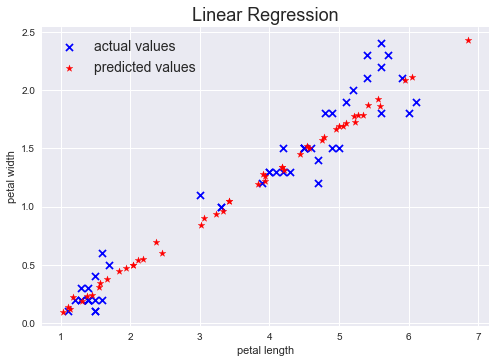

In [81]:
plt.style.use('seaborn')
# plot actual values
x = Y_test[:,0]
y = Y_test[:,1]
plt.scatter(x,y, 
            c='blue', 
            label='actual values', 
            marker='x', 
            s=50)
# plot predicted values
x1 = Y_test_pred[:,0]
y1 = Y_test_pred[:,1]
plt.scatter(x1,y1, 
            c='r', 
            label='predicted values', 
            marker='*', 
            s=50)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Linear Regression', fontsize=18)
plt.legend(fontsize=14)
plt.show()

### Comparison with Sklearn LinearRegression

In [82]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
Y_pred_skl = reg.predict(X_test)

In [83]:
# sklearn weights
reg.coef_

array([[ 1.75717868, -1.39333611],
       [ 0.71280047, -0.48946417]])

In [84]:
# MultivariateOLS
ols.weights[1:].T

array([[ 1.75717868, -1.39333611],
       [ 0.71280047, -0.48946417]])

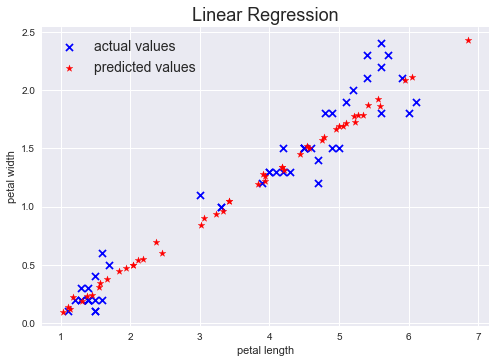

In [85]:
plt.style.use('seaborn')
# plot actual values
x = Y_test[:,0]
y = Y_test[:,1]
plt.scatter(x,y, c='blue', label='actual values', marker='x', s=50)
# plot predicted values
x1 = Y_pred_skl[:,0]
y1 = Y_pred_skl[:,1]
plt.scatter(x1,y1, c='r', label='predicted values', marker='*', s=50)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Linear Regression', fontsize=18)
plt.legend(fontsize=14)
plt.show()